# Задание 4

## Описание

Провести PCA на data_big.csv. Интерпретировать главные компоненты на основе факторных весов.

## Подготовка

In [4]:
import numpy as np
import pandas as pd
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [5]:
data = pd.read_csv('data_big.csv')

## Решение

In [47]:
def principal_component_analysis(
        data,
        n_components=3,
        drop_columns=['combined1.1', 'combined2.1'],
):
    data = data.copy()

    # Из кода на R c пары
    
    # X <- na.omit(data[,c(3:20,23:31)])
    data.drop(columns=drop_columns, inplace=True)
    data.dropna(inplace=True)

    # pc <- princomp(scale(X))
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data)
    model = PCA(n_components=n_components)
    model.fit(scaled_data)

    # (pcsdev/sum(pcsdev)*100)[seq(10)]
    variance_contribution = model.explained_variance_ratio_ * 100
    
    # pc$loadings[,seq(3)]
    components = pd.DataFrame(model.components_.T, index=data.columns)
    
    # pc$scores
    scores = model.transform(scaled_data)

    return variance_contribution, components, scores
     

def compare_component_scores(scores: np.ndarray, first_component_index: int, second_component_index: int) -> None:
    fig = px.scatter(
        scores,
        x=first_component_index,
        y=second_component_index,
        hover_data={'index': list(range(scores.shape[0]))},
    )
    
    fig.update_traces(marker=dict(size=10, line=dict(width=2, color='DarkSlateGrey')),
                      selector=dict(mode='markers'))
    
    fig.update_layout(
        title=f'Relationship Between Component {first_component_index} and Component {second_component_index}',
        title_x=0.5,
        paper_bgcolor='LightSteelBlue',
        plot_bgcolor='Azure',
        hovermode='closest',
        showlegend=False
    )
    
    fig.update_xaxes(title=f'Component {first_component_index}', gridcolor='LightGray')
    fig.update_yaxes(title=f'Component {second_component_index}', gridcolor='LightGray')
    
    fig.show()

In [7]:
first_day = data.iloc[:, 2:31]
first_day_variance_contribution, first_day_components, first_day_scores = principal_component_analysis(first_day)

In [8]:
first_day_variance_contribution

array([20.05844683, 15.95005239,  9.35910533])

In [9]:
first_day_components

,0,1,2
depressed.mood.1,-0.185961,0.109399,0.208067
anxiety.1,-0.062101,0.062217,0.098085
suspiciousness.1,-0.064675,0.271265,0.293979
irritability.1,-0.049026,0.146249,-0.017966
craving.to.alcohol.1,-0.160420,0.278009,-0.150759
weakness.1,-0.156399,0.136650,-0.139019
insomia.1,0.001480,0.065864,0.404339
headache.1,0.021112,0.272655,0.314640
tremor.1,-0.069909,0.292130,-0.180044
polyuria.1,0.034275,0.074385,0.261947


In [31]:
top_10_comp_0 = first_day_components[abs(first_day_components[0]) > 0.2][0]
top_10_comp_1 = first_day_components[abs(first_day_components[1]) > 0.2][1]  
top_10_comp_2 = first_day_components[abs(first_day_components[2]) > 0.2][2]

In [32]:
top_10_comp_0
# тут HR, DBP, SV, ... -- метрики, связанные с сердцем, => наблюдаем в основном влияние на сердечно-сосудистую систему

anoreksia.1   -0.213481
HR.1          -0.201318
DBP.1         -0.231029
SV.1           0.375898
CO.1           0.345339
SI.1           0.381605
CI.1           0.338751
TPR.1         -0.346082
Name: 0, dtype: float64

In [33]:
top_10_comp_1
# в основном влияние на ЖКТ

suspiciousness.1        0.271265
craving.to.alcohol.1    0.278009
headache.1              0.272655
tremor.1                0.292130
vomiting.1              0.262921
diarrhea.1              0.228505
thirst.1                0.231991
hyperemia.1             0.225641
SBP.1                   0.315922
MBP.1                   0.233747
CO.1                    0.206766
CI.1                    0.225518
Name: 1, dtype: float64

In [35]:
top_10_comp_2
# в основном влияние на нервную систему

depressed.mood.1              0.208067
suspiciousness.1              0.293979
insomia.1                     0.404339
headache.1                    0.314640
polyuria.1                    0.261947
transient.hallusinations.1    0.213997
diarrhea.1                    0.228759
HR.1                         -0.240943
SBP.1                        -0.244113
DBP.1                        -0.214633
MBP.1                        -0.239110
Name: 2, dtype: float64

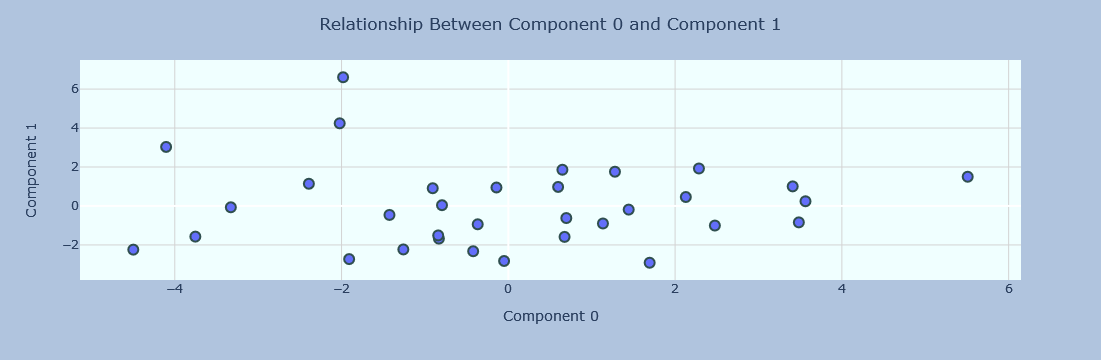

In [48]:
compare_component_scores(first_day_scores, 0, 1)

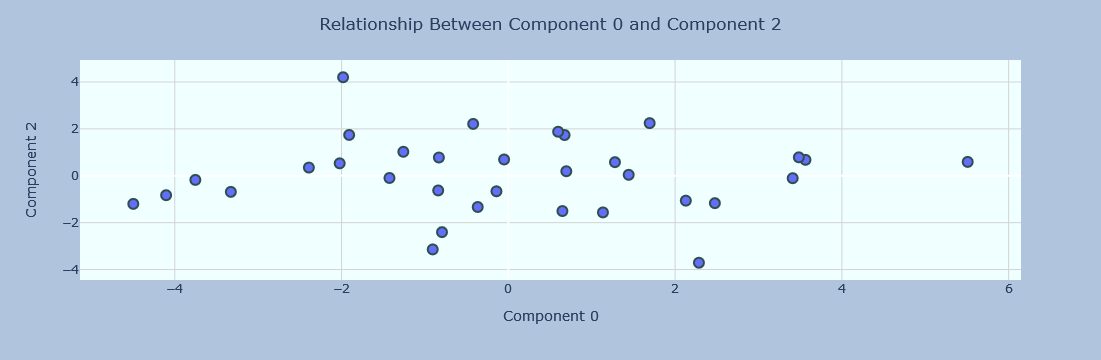

In [49]:
compare_component_scores(first_day_scores, 0, 2)

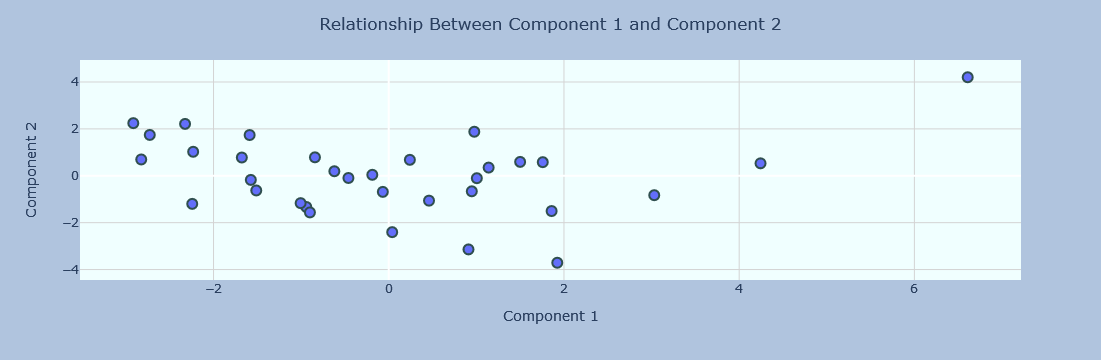

In [50]:
compare_component_scores(first_day_scores, 1, 2)